In [53]:

import plot_utils
from plot_utils import LogFile,LogFileType,Fig,Roller
import rolling_funcs

WINDOW_SECS=20.0

In [54]:

response_rollers = [
    Roller("OK rate", rolling_funcs.count_ok, rate=True),
    Roller("ERR rate", rolling_funcs.count_err, rate=True, kwargs={'linestyle':'--'}),
]
mean_roller = Roller('mean', rolling_funcs.mean)
packet_rate = Roller('rate', rolling_funcs.count_kleene_packets, rate=True)

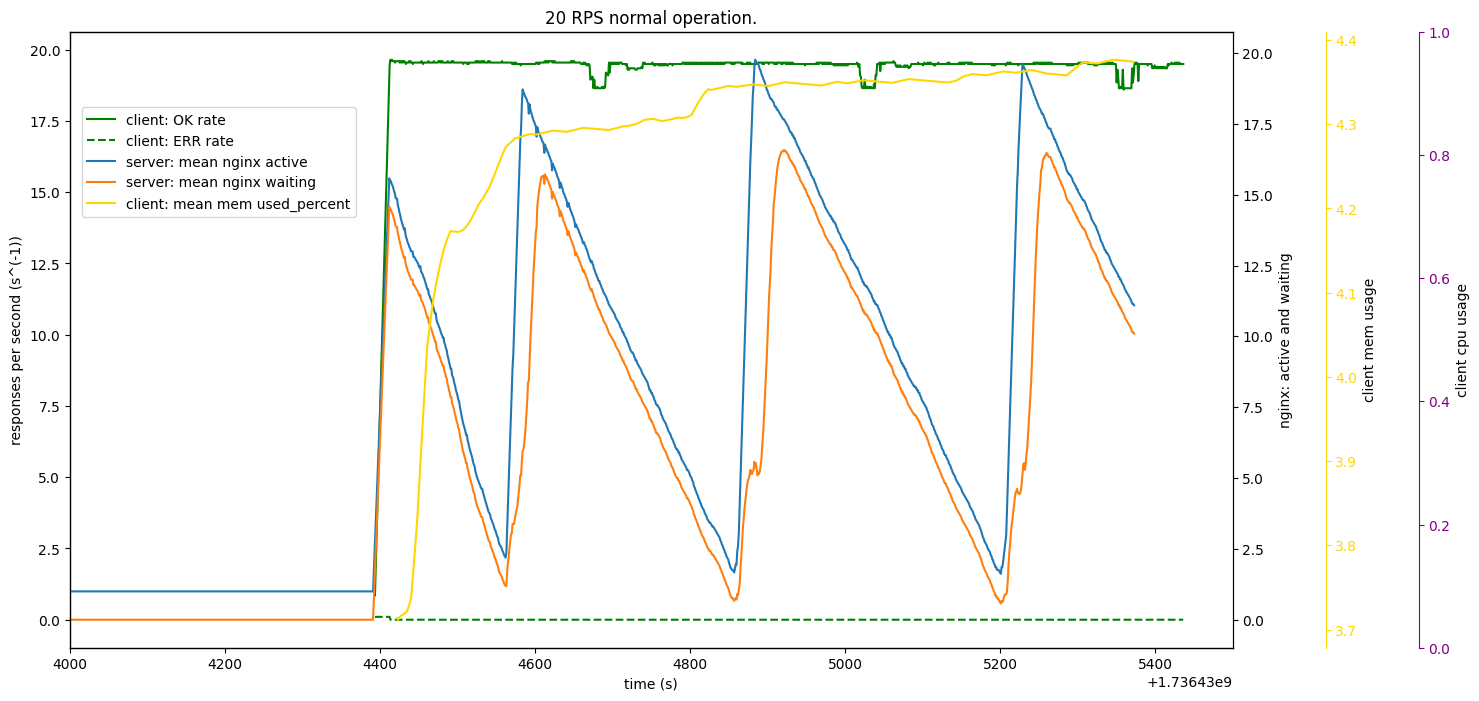

In [55]:
HILBERT="./logs/hilbert/2025-01-09_15:09:27.json"
KLEENE="./logs/kleene/2025-01-09_14-53-12.453879.txt"
KLEENE_TELEGRAF="./logs/kleene/2025-01-09_15:09:27.json"

fig,ax = plot_utils.fig([Fig(title='20 RPS normal operation.',x='time (s)',y='responses per second (s^(-1))')])
ax.set_xlim(4000+1.73643e9,5500+1.73643e9)

nginx_active = LogFile(log_type=LogFileType.TELEGRAF, path=HILBERT,
kwargs={'telegraf': {
    'nginx' : ['active', 'waiting']
}
})
nginx_writing = LogFile(log_type=LogFileType.TELEGRAF, path=HILBERT,
kwargs={'telegraf': {
    'nginx' : ['writing']
}, 'color':'gold'
})

client_mem = LogFile(log_type=LogFileType.TELEGRAF, path=KLEENE_TELEGRAF,
kwargs={'telegraf':{
    # 'mem' : ['used_percent','buffered','cached','vmalloc_used']
    'mem' : [{'used_percent':{'color':'gold'}}]
}})

client_log = LogFile(log_type=LogFileType.GOT, path=KLEENE,kwargs={'color':'g'})

ax_active,ax_mem,ax_cpu = plot_utils.add_y_axes(
    ax, [('nginx: active and waiting','black'),('client mem usage','gold'),('client cpu usage','purple')]
)

plot_utils.overlay_rolling(ax_active, {'server': nginx_active}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax_mem, {'client': client_mem}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax, {'client': client_log}, response_rollers, WINDOW_SECS, const_stride_secs=1.0, times_units='s')

plot_utils.show_combined_legends([ax,ax_active,ax_mem,ax_cpu], loc=[0.01,0.7])
fig.savefig('./plots/20RPS.png')